In [ ]:
# ARIMA Model 
"""
AR: < Auto Regressive > means that the model uses the dependent relationship between
an observation and some predefined number of lagged observations (also known as “time lag” or “lag”).
I:< Integrated > means that the model employs differencing of raw observations 
(e.g. it subtracts an observation from an observation at the previous time step) in order to make the time-series stationary.
MA: < Moving Average > means that the model exploits the relationship between the residual error and the observations."""

In [13]:
from google.colab import drive
import os
drive.mount('/content/drive/')
!pwd 
%cd /content/drive/MyDrive/LSTM\ project/LSTM # move to curdir

Mounted at /content/drive/
/content
/content/drive/MyDrive/LSTM project/LSTM


#Model parameters
###The standard ARIMA models expect as input parameters 3 arguments i.e. p,d,q.
####p is the number of lag observations.
####d is the degree of differencing.
####q is the size/width of the moving average window.

In [14]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


In [15]:
df = pd.read_csv("TSLA.csv")
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
1,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
2,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
3,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000
4,2015-07-16,52.844002,53.439999,52.632000,53.335999,53.335999,8080000


●　Our target variable will be the Close value


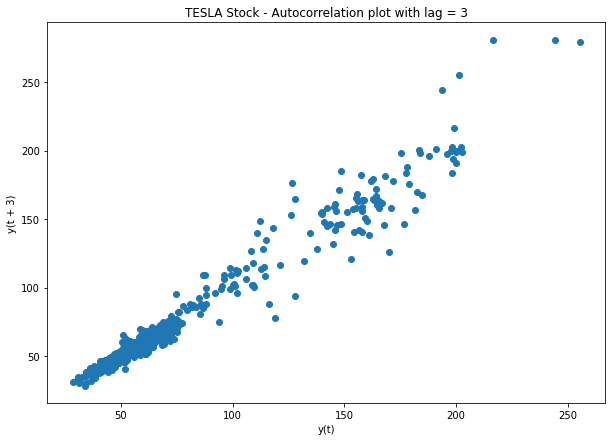

In [21]:
# Before building the ARIMA model, let’s see if there is some cross-correlation in out data.
plt.figure(figsize=(10, 7))
lag_plot(df['Open'], lag=3)
plt.title('TESLA Stock - Autocorrelation plot with lag = 3')
plt.show()

##We can now confirm that ARIMA is going to be a good model to be applied to this type of data (there is auto-correlation in the data).
###Finally, let’s plot the stock price evolution over time.

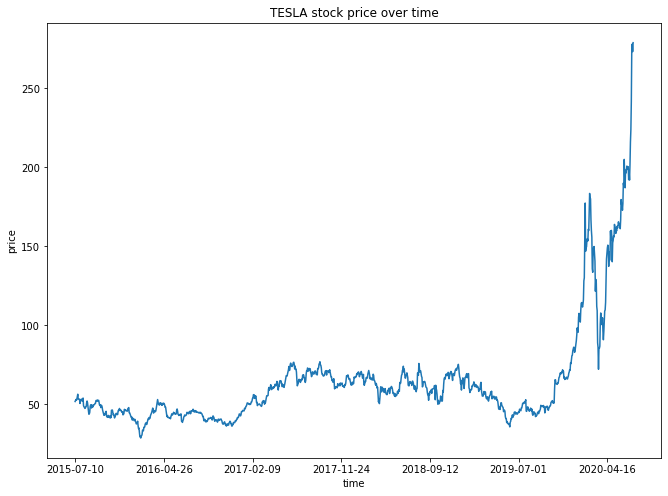

In [25]:
plt.figure(figsize=(11, 8))
plt.plot(df["Date"], df["Close"])
plt.xticks(np.arange(0,1259, 200), df['Date'][0:1259:200])
plt.title("TESLA stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

##Next, let’s divide the data into a training (70 % ) and test (30%) set. 
##For this tutorial we select the following ARIMA parameters: p=4, d=1 and q=0.

In [40]:
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
print(f"train_data, test_data = {train_data.shape}, {test_data.shape}")
training_data = train_data['Close'].values
test_data = test_data['Close'].values
print(f"train_data, test_data = {train_data.shape}, {test_data.shape}")
history = [x for x in training_data]
print(len(history))
model_predictions = []
N_test_observations = len(test_data) #881
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    
    # 以下でtrain_dataへ追加をして、array全体を動かすことでautocorrelationモデルでは全体のoutputに変化生じさせる
    true_test_value = test_data[time_point] # move one day of data from test_data to train_data
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))
print(f"model_predictions = {model_predictions}")

train_data, test_data = (881, 7), (378, 7)
train_data, test_data = (881, 7), (378,)
881


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Testing Mean Squared Error is 29.642383974468665
model_predictions = [array([67.2550557]), array([67.60964927]), array([68.87036962]), array([69.49071464]), array([66.98108641]), array([68.74657981]), array([69.21674886]), array([69.58552722]), array([60.73638978]), array([59.63719372]), array([57.54176994]), array([58.43640099]), array([59.4219484]), array([59.37851008]), array([59.46930067]), array([61.67254947]), array([61.48758832]), array([62.40950811]), array([62.55300359]), array([64.24582948]), array([63.50331705]), array([61.54852014]), array([61.08669681]), array([62.54975676]), array([62.46304121]), array([61.67063179]), array([60.73958102]), array([61.54599166]), array([61.18952276]), array([60.5501136]), array([58.28823389]), array([58.88446639]), array([59.77118005]), array([59.65458811]), array([62.83468739]), array([64.02204111]), array([59.14764764]), array([56.95447761]), array([55.30704518]), array([55.3683868]), array([55.37855002]), array([56.84902617]), array([58.

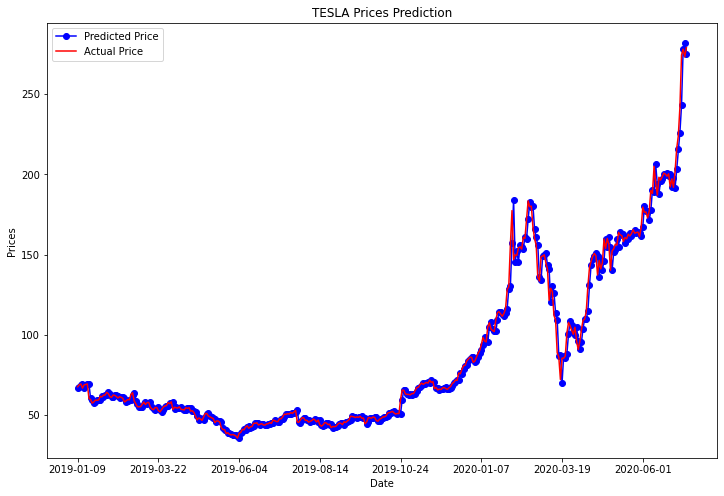

In [41]:
plt.figure(figsize=(12,8))
test_set_range = df[int(len(df)*0.7):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('TESLA Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(881,1259,50), df.Date[881:1259:50])
plt.legend()
plt.show()